In [1]:
from ewatercycle_leakybucket.model import LeakyBucket
from ewatercycle.base.forcing import GenericLumpedForcing
import ewatercycle.observation.grdc
import ewatercycle.analysis
import ewatercycle.models
from pathlib import Path
from cartopy.io import shapereader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ewatercycle.container import ContainerImage

#shapefile that describes the basin we want to study.
shapeFile = "/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_progress/Test_Aral/AralSea_Basin/AralSeaBasin.shp"

#GRDC station ID for the observation station
grdc_station_id = "2617110"  # GRDC station ID
basin_name = "AMU DARYA"

#period of interest. Make sure that ERA5 is available on your machine for this period.
experiment_start_time="1990-01-01T00:00:00Z"
experiment_end_time="1990-12-31T00:00:00Z"

/opt/conda/envs/ewatercycle2/lib/python3.12/site-packages/esmvalcore/experimental/_warnings.py:13: UserWarning: 
  Thank you for trying out the new ESMValCore API.
  Note that this API is experimental and may be subject to change.
  More info: https://github.com/ESMValGroup/ESMValCore/issues/498


In [2]:
forcing = GenericLumpedForcing.generate(
    dataset='ERA5',
    start_time=experiment_start_time,
    end_time=experiment_end_time,
    shape=shapeFile
)

In [3]:

my_image = ContainerImage("/home/avandervee3/leakybucket_andre.sif")

model = LeakyBucket(forcing=forcing,
                    bmi_image=my_image)
cfg_file, _ = model.setup(leakiness=0.10)



In [4]:
model.initialize(cfg_file)

In [5]:


import xarray as xr

discharges = []
storages = []
n=0;
while model.time < model.end_time:
    discharges.append(model.get_value_as_xarray("discharge"))
    storages.append(model.get_value_as_xarray("storage"))
    model.update()
    if n % 100 == 0:
        model.set_value("storage", np.array([30], dtype=np.float32))  # reset storage to 30 mm every 100 time steps
    n+=1





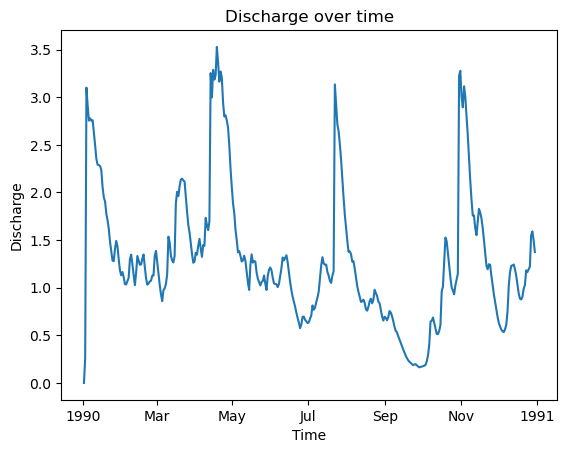

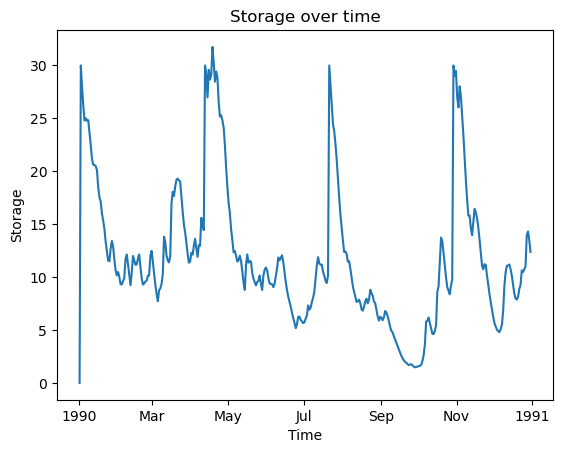

In [6]:
# Combine the time series
discharge = xr.concat(discharges, dim="time")
storages = xr.concat(storages, dim="time")

# Plot discharge on its own figure
plt.figure()            # creates a new figure
discharge.plot()
plt.title("Discharge over time")
plt.xlabel("Time")
plt.ylabel("Discharge")  # or your units
plt.show()

# Plot storage on its own figure
plt.figure()            # creates another new figure
storages.plot()
plt.title("Storage over time")
plt.xlabel("Time")
plt.ylabel("Storage")  # or your units
plt.show()

In [7]:
discharge


<xarray.DataArray 'discharge' (time: 364, latitude: 1, longitude: 1)> Size: 3kB
array([[[0.        ]],

       [[0.2596936 ]],

       [[3.1008686 ]],

       [[2.90861229]],

       [[2.75432404]],

       [[2.77822796]],

       [[2.75400854]],

       [[2.75830699]],

       [[2.62745798]],

       [[2.49608026]],

...

       [[0.98738622]],

       [[1.02859592]],

       [[1.18217586]],

       [[1.16418593]],

       [[1.1936329 ]],

       [[1.22246811]],

       [[1.55074852]],

       [[1.59065681]],

       [[1.50158931]],

       [[1.37527138]]])
Coordinates:
  * longitude  (longitude) float64 8B 68.38
  * latitude   (latitude) float64 8B 43.12
  * time       (time) datetime64[ns] 3kB 1990-01-01T12:00:00 ... 1990-12-30T1...
Attributes:
    units:    m d-1

In [8]:
df = discharge.to_dataframe(name="discharge").reset_index()

# df heeft nu kolommen: time, x, y, discharge (afhankelijk van je dimensies)
print(df.head())

                 time  latitude  longitude  discharge
0 1990-01-01 12:00:00    43.125     68.375   0.000000
1 1990-01-02 12:00:00    43.125     68.375   0.259694
2 1990-01-03 12:00:00    43.125     68.375   3.100869
3 1990-01-04 12:00:00    43.125     68.375   2.908612
4 1990-01-05 12:00:00    43.125     68.375   2.754324


In [9]:
from grpc4bmi.bmi_client_singularity import BmiClientSingularity

model = BmiClientSingularity('/home/avandervee3/leakybucket_henk.sif', work_dir='/tmp')
print(model.get_component_name())
del model

leakybucket_versie_henk


In [10]:

my_image_henk = ContainerImage("/home/avandervee3/leakybucket_henk.sif")

model_henk = LeakyBucket(forcing=forcing,
                    bmi_image=my_image_henk)
cfg_file_henk, _ = model_henk.setup(leakiness=0.10)

In [11]:
model_henk.initialize(cfg_file_henk)

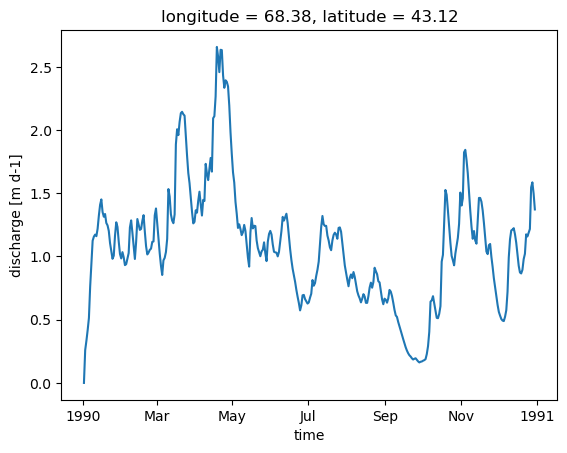

In [12]:


import xarray as xr

discharges_henk = []
while model_henk.time < model_henk.end_time:
    discharges_henk.append(model_henk.get_value_as_xarray("discharge"))
    model_henk.update()

discharges_henk = xr.concat(discharges_henk, dim="time")
discharges_henk.plot()



In [13]:
print(model_henk.bmi.get_component_name())

leakybucket_versie_henk


In [14]:
dir(model_henk)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__class_vars__',
 '__copy__',
 '__deepcopy__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__fields__',
 '__fields_set__',
 '__format__',
 '__ge__',
 '__get_pydantic_core_schema__',
 '__get_pydantic_json_schema__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__pretty__',
 '__private_attributes__',
 '__pydantic_complete__',
 '__pydantic_computed_fields__',
 '__pydantic_core_schema__',
 '__pydantic_custom_init__',
 '__pydantic_decorators__',
 '__pydantic_extra__',
 '__pydantic_fields__',
 '__pydantic_fields_set__',
 '__pydantic_generic_metadata__',
 '__pydantic_init_subclass__',
 '__pydantic_parent_namespace__',
 '__pydantic_post_init__',
 '__pydantic_private__',
 '__pydantic_root_model__',
 '__pydantic_serializer__',
 '__pydantic_v

In [15]:
print(ewatercycle.models.sources)

ModelSources[
    "HBV",
    "HBVLocal",
    "Hype",
    "LeakyBucket",
    "Lisflood",
    "MarrmotM01",
    "MarrmotM14",
    "PCRGlobWB",
    "Wflow",
    "WflowJl"
]


In [16]:
from ewatercycle.models import PCRGlobWB


In [17]:
# parameter_set = ewatercycle.parameter_sets.ParameterSet(
#     name="custom_parameter_set",
#     directory=pcr_glob_directory,
#     config= Path.cwd() / "pcrglobwb_aral_basin_ERA5_05min.ini",
#     target_model="pcrglobwb",
#     supported_model_versions={"setters"},
# )


In [18]:
# PCRGlobWB().bmi_image.apptainer_filename